In [ ]:
%pip install pennylane

<Wires = ['i_0', 'i_1', 'i_2', 'i_3', 'i_4', 'i_5', 'o_0', 'o_1', 'o_2', 'o_3', 'o_4', 'o_5']>


(<Figure size 288x936 with 1 Axes>, <Axes:>)

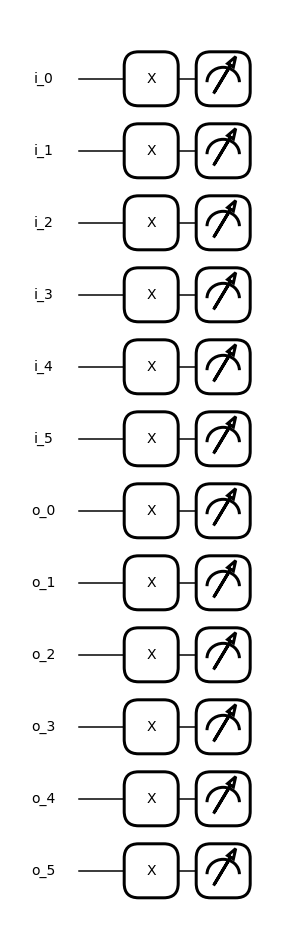

In [36]:
import pennylane as qml

n=6

dev = qml.device("default.qubit", wires=[f"{l}_{x}" for l in "io" for x in range(n)])

class LucasOperator(qml.operation.Operation):
    # Define how many wires the operator acts on in total.
    # In our case this may be one or two, which is why we
    # use the AnyWires Enumeration to indicate a variable number.
    num_wires = qml.operation.AnyWires
    
    @staticmethod
    def compute_decomposition(wires):  # pylint: disable=arguments-differ
        # Overwriting this method defines the decomposition of the new gate, as it is
        # called by Operator.decomposition().
        # The general signature of this function is (*parameters, wires, **hyperparameters).
        qml.broadcast(qml.PauliX, wires=wires, pattern="single")

print(dev.wires)
# Création du circuit

@qml.qnode(dev)
def circuit():
    LucasOperator(dev.wires)
    return qml.state()

qml.draw_mpl(circuit)()